2024-04-06 19:54:48.815258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 19:54:48.815441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 19:54:48.989886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29
Dimenzije trening podataka:
X shape: (15219, 224, 224, 3)
Y shape: (15219,)

Dimenzije validacijskih podataka:
X_valid shape: (3922, 224, 224, 3)
Y_valid shape: (3922,)
Broj slika: 19141


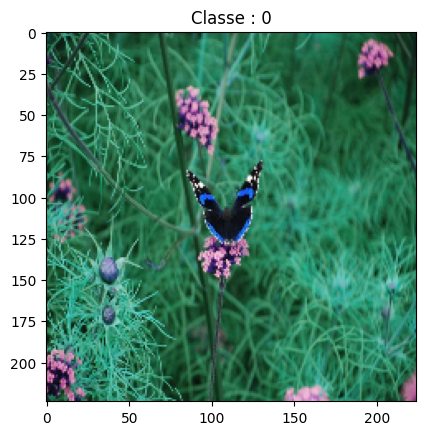

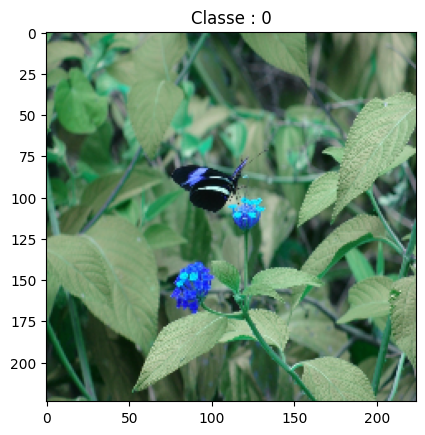

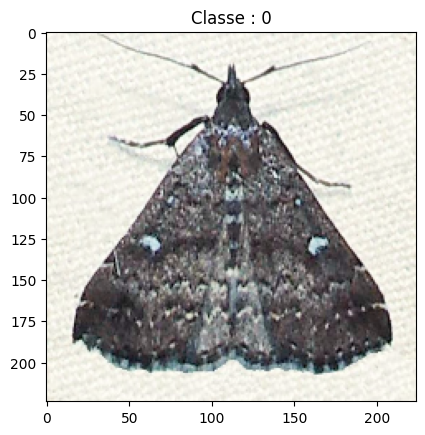

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ ?                      │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,673,823 (67.42 MB)

 Trainable params: 17,548,616 (66.94 MB)

 Non-trainable params: 125,207 (489.09 KB)

Epoch 1/5
476/476 ━━━━━━━━━━━━━━━━━━━━ 8438s 17s/step - accuracy: 0.6827 - loss: 1.1671 - val_accuracy: 0.7807 - val_loss: 0.8773
Epoch 2/5
476/476 ━━━━━━━━━━━━━━━━━━━━ 8354s 17s/step - accuracy: 0.8608 - loss: 0.4500 - val_accuracy: 0.8167 - val_loss: 0.6643
Epoch 3/5
476/476 ━━━━━━━━━━━━━━━━━━━━ 8299s 17s/step - accuracy: 0.8882 - loss: 0.3391 - val_accuracy: 0.8251 - val_loss: 0.6350
Epoch 4/5
476/476 ━━━━━━━━━━━━━━━━━━━━ 8352s 18s/step - accuracy: 0.9079 - loss: 0.2762 - val_accuracy: 0.8118 - val_loss: 0.7467
Epoch 5/5
476/476 ━━━━━━━━━━━━━━━━━━━━ 8095s 17s/step - accuracy: 0.9159 - loss: 0.2585 - val_accuracy: 0.8422 - val_loss: 0.6496
123/123 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.8574 - loss: 0.5825
Test Loss: 0.6496106386184692
Test Accuracy: 0.842172384262085
123/123 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step
              precision    recall  f1-score   support

   Butterfly       0.76      0.92      0.83       170
 Caterpillar       0.76      0.76      0.76        70
     C

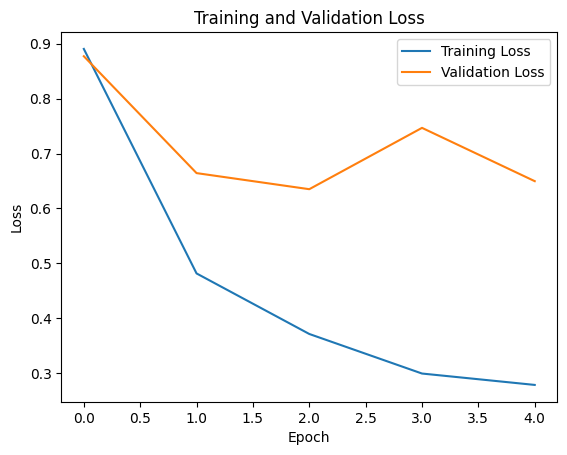

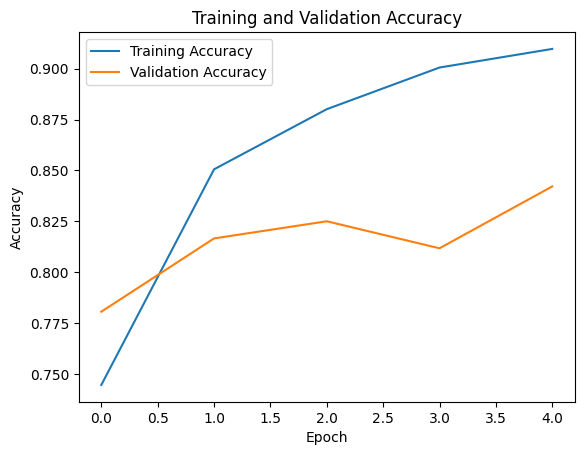

Mikro prosečne metrike:
Mikro preciznost: 0.8421723610402856
Mikro odziv: 0.8421723610402856
Mikro F1-score: 0.8421723610402856

Makro prosečne metrike:
Makro preciznost: 0.8171651326996513
Makro odziv: 0.7961439769687997
Makro F1-score: 0.7955210370929957


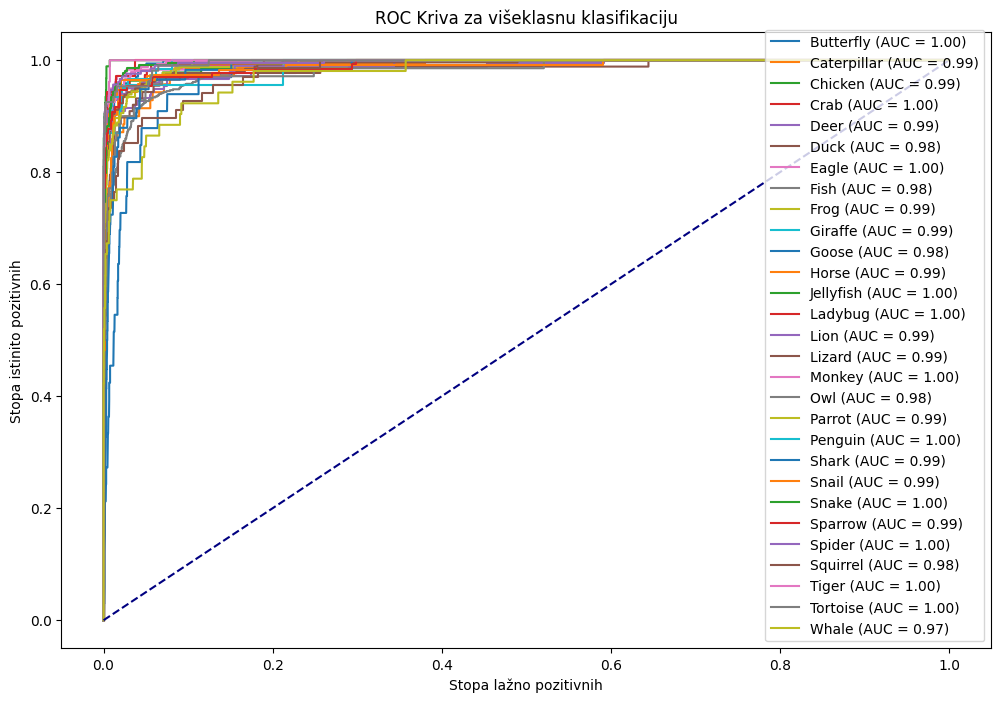

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

#EfficientNetB4 model
from tensorflow.keras.applications import EfficientNetB4
import random

train_dir = r'/kaggle/input/animals-detection-images-dataset/train/'
test_dir = r'/kaggle/input/animals-detection-images-dataset/test/'

labels = ['Butterfly',
       'Caterpillar','Chicken', 'Crab',
       'Deer', 'Duck', 'Eagle','Fish',
       'Frog', 'Giraffe','Goose', 'Horse',
       'Jellyfish', 'Ladybug', 'Lion',
       'Lizard','Monkey','Owl', 'Parrot',
       'Penguin',
       'Shark','Snail', 'Snake',
       'Sparrow', 'Spider','Squirrel',
       'Tiger', 'Tortoise','Whale']

label_len = len(labels)
print(label_len)

# Varijable za trening podatke
X = []
Y = []

# Učitavanje podataka
for label in labels:
    folderpath = os.path.join(train_dir, label)
   
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
       
        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Konverzija listi u NumPy matrice
X = np.array(X)
Y = np.array(Y)

print("Dimenzije trening podataka:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Varijable za validacijske podatke
X_valid = []
Y_valid = []
X_valid_path = []

for label in labels:
    folderpath = os.path.join(test_dir, label)
   
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
       
        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))
           
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

print("\nDimenzije validacijskih podataka:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)

total_images = X.shape[0] + X_valid.shape[0]
print("Broj slika:", total_images)

for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Classe : {Y[i]}")
    plt.show()

   
# Putanja do prethodno preuzetih težina modela
weights_path = '/kaggle/input/eficient/efficientnetb4_notop.h5'

# Učitavanje EfficientNetB4 modela bez slojeva za klasifikaciju
efficientnet_model = EfficientNetB4(weights=None, include_top=False, input_shape=(224, 224, 3))

# Učitavanje težina iz lokalnog fajla
efficientnet_model.load_weights(weights_path)

# Dodavanje slojeva za klasifikaciju na vrh
model = Sequential()
model.add(efficientnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(len(labels), activation='softmax'))

# Kompilacija modela
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ispisivanje arhitekture modela
model.summary()

# Konverzija oznaka u kategorije one-hot
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)

# Treniranje modela
history = model.fit(X, Y_one_hot, epochs=5, validation_data=(X_valid, Y_valid_one_hot))

# Evaluacija modela
loss, accuracy = model.evaluate(X_valid, Y_valid_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predikcija na validacijskom skupu
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Ispisivanje izveštaja o klasifikaciji
classification_report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(classification_report)

# Iscrtavanje grafova za gubitak i tačnost tokom treninga
def plot_training_history(history):
    # Grafikon gubitka tokom treninga
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Grafikon tačnosti tokom treninga
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Poziv funkcije za iscrtavanje grafova
plot_training_history(history)

# Izračunavanje mikro prosečnih metrika
micro_precision = precision_score(Y_valid, Y_pred_classes, average='micro')
micro_recall = recall_score(Y_valid, Y_pred_classes, average='micro')
micro_f1 = f1_score(Y_valid, Y_pred_classes, average='micro')

print("Mikro prosečne metrike:")
print("Mikro preciznost:", micro_precision)
print("Mikro odziv:", micro_recall)
print("Mikro F1-score:", micro_f1)

# Izračunavanje makro prosečnih metrika
macro_precision = precision_score(Y_valid, Y_pred_classes, average='macro')
macro_recall = recall_score(Y_valid, Y_pred_classes, average='macro')
macro_f1 = f1_score(Y_valid, Y_pred_classes, average='macro')

print("\nMakro prosečne metrike:")
print("Makro preciznost:", macro_precision)
print("Makro odziv:", macro_recall)
print("Makro F1-score:", macro_f1)

# Izračunavanje ROC krive i AUC za svaku klasu
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(Y_valid_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Prikazivanje ROC krive za svaku klasu
plt.figure(figsize=(12, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Stopa lažno pozitivnih')
plt.ylabel('Stopa istinito pozitivnih')
plt.title('ROC Kriva za višeklasnu klasifikaciju')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


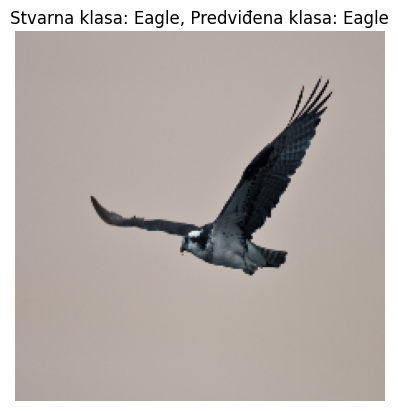

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


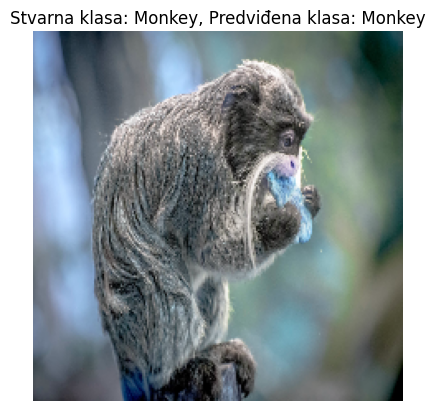

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


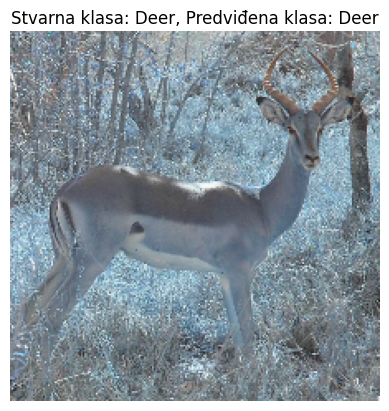

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


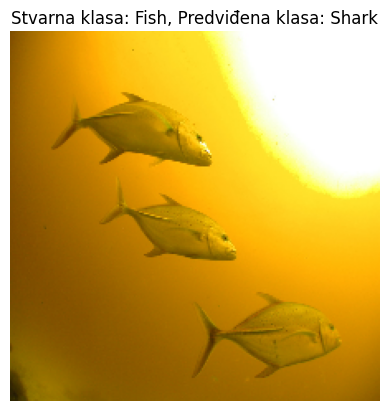

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


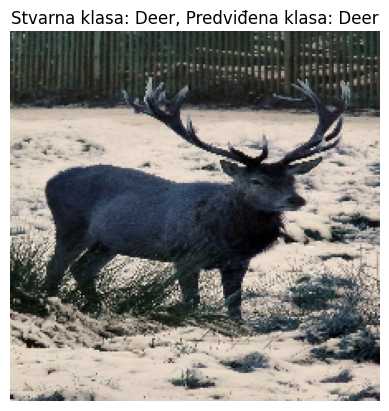

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


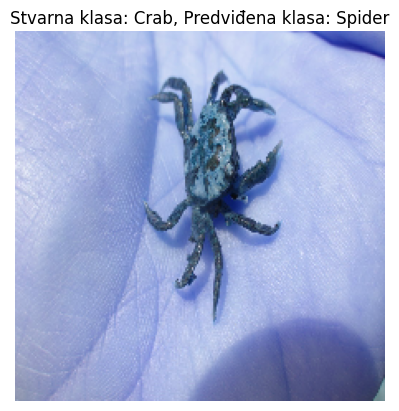

In [5]:
# Funkcija za prikaz slike i pripadajućih stvarnih i predviđenih klasa
def display_random_images_with_predictions(num_images):
    for _ in range(num_images):
        # Izbor nasumične slike iz validacijskog skupa
        idx = random.randint(0, len(X_valid) - 1)
        image = X_valid[idx]
        true_label = labels[Y_valid[idx]]
       
        # Predikcija klase za izabranu sliku koristeći efficientnet_model
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label_idx = np.argmax(prediction)
        predicted_label = labels[predicted_label_idx]
       
        # Prikaz slike i pripadajućih klasa
        plt.imshow(image)
        plt.title(f"Stvarna klasa: {true_label}, Predviđena klasa: {predicted_label}")
        plt.axis('off')
        plt.show()

# Poziv funkcije za prikaz nasumičnih slika i pripadajućih klasa
display_random_images_with_predictions(6)